In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline

df1 = pd.read_csv("../../data/safe_sim.csv")
df2 = pd.read_csv("../../data/risky_sim.csv")

df = pd.merge(df1, df2, on=['Year', 'Team'], how='outer')

del df["Unnamed: 0_x"]
del df["Unnamed: 0_y"]

df["Proj_Wins"] = 0.67 * df["Proj_Wins_Safe"] + 0.33 * df["Proj_Wins_Risky"]

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024, 2025]

df['Sim_Wins'] = [-1 for _ in range(len(df))]

In [3]:
def same_seed(df, seed, r):
    
    subdf = pd.DataFrame(df[df["Seed"] == seed])
    team1 = subdf.head(1)
    team1index = team1["Team"].index
    team2 = subdf.tail(1)
    team2index = team2["Team"].index

    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = r

    else:
        df.loc[team1index, "Sim_Wins"] = r
        
    return df

def round64(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    seeds1 = [1,2,3,4,5,6,7,8]
    seeds2 = [16,15,14,13,12,11,10,9]
    
    for i in range(0,8):
        
        rdf = subdf[(subdf["Seed"] == seeds1[i]) | (subdf["Seed"] == seeds2[i])]
        team1 = rdf.head(1)
        team1index = team1["Team"].index
        team2 = rdf.tail(1)
        team2index = team2["Team"].index
        
        if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
            df.loc[team2index, "Sim_Wins"] = 0
            
        else:
            df.loc[team1index, "Sim_Wins"] = 0
            
    return df

def round32(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    team1 = subdf[(subdf["Seed"] == 1) | (subdf["Seed"] == 16)]
    team1index = team1["Team"].index
    team2 = subdf[(subdf["Seed"] == 8) | (subdf["Seed"] == 9)]
    team2index = team2["Team"].index
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 1
    else:
        df.loc[team1index, "Sim_Wins"] = 1
    
    team3 = subdf[(subdf["Seed"] == 5) | (subdf["Seed"] == 12)]
    team3index = team3["Team"].index
    team4 = subdf[(subdf["Seed"] == 4) | (subdf["Seed"] == 13)]
    team4index = team4["Team"].index
    if team3["Proj_Wins"].iloc[0] > team4["Proj_Wins"].iloc[0]:
        df.loc[team4index, "Sim_Wins"] = 1
    else:
        df.loc[team3index, "Sim_Wins"] = 1
    
    team5 = subdf[(subdf["Seed"] == 6) | (subdf["Seed"] == 11)]
    team5index = team5["Team"].index
    team6 = subdf[(subdf["Seed"] == 3) | (subdf["Seed"] == 14)]
    team6index = team6["Team"].index
    if team5["Proj_Wins"].iloc[0] > team6["Proj_Wins"].iloc[0]:
        df.loc[team6index, "Sim_Wins"] = 1
    else:
        df.loc[team5index, "Sim_Wins"] = 1
    
    team7 = subdf[(subdf["Seed"] == 7) | (subdf["Seed"] == 10)]
    team7index = team7["Team"].index
    team8 = subdf[(subdf["Seed"] == 2) | (subdf["Seed"] == 15)]
    team8index = team8["Team"].index
    if team7["Proj_Wins"].iloc[0] > team8["Proj_Wins"].iloc[0]:
        df.loc[team8index, "Sim_Wins"] = 1
    else:
        df.loc[team7index, "Sim_Wins"] = 1
        
    return df

def sweet16(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    options1 = [1,8,9,16]
    for i in options1:
        if not subdf[subdf["Seed"] == i].empty:
            team1 = subdf[subdf["Seed"] == i]
            break
    team1index = team1["Team"].index
    options2 = [4,5,12,13]
    for i in options2:
        if not subdf[subdf["Seed"] == i].empty:
            team2 = subdf[subdf["Seed"] == i]
            break
    team2index = team2["Team"].index
        
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 2
    else:
        df.loc[team1index, "Sim_Wins"] = 2
        
    options3 = [3,6,11,14]
    for i in options3:
        if not subdf[subdf["Seed"] == i].empty:
            team3 = subdf[subdf["Seed"] == i]
            break 
    team3index = team3["Team"].index
    options4 = [2,7,10,15]
    for i in options4:
        if not subdf[subdf["Seed"] == i].empty:
            team4 = subdf[subdf["Seed"] == i]
            break
    team4index = team4["Team"].index
        
    if team3["Proj_Wins"].iloc[0] > team4["Proj_Wins"].iloc[0]:
        df.loc[team4index, "Sim_Wins"] = 2
    else:
        df.loc[team3index, "Sim_Wins"] = 2
        
    return df

def elite8(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    options1 = [1,4,5,8,9,12,13,16]
    for i in options1:
        if not subdf[subdf["Seed"] == i].empty:
            team1 = subdf[subdf["Seed"] == i]
            break
    team1index = team1["Team"].index
    
    options2 = [2,3,6,7,10,11,14,15]
    for i in options2:
        if not subdf[subdf["Seed"] == i].empty:
            team2 = subdf[subdf["Seed"] == i]
            break
    team2index = team2["Team"].index
    
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 3
    else:
        df.loc[team1index, "Sim_Wins"] = 3
        
    return df

def region_simulation(data, year, region):
    
    seeds = list(range(1,17))
    
    df = data[(data["Year"] == year) & (data["Region"] == region)]
    ###########################################################################
    # FIRST FOUR
    r = 0
    
    for seed in seeds:
    
        if df[df["Seed"] == seed].shape[0] != 1:
            
            df = same_seed(df, seed, r)
    ##########################################################################
    ##########################################################################
    # FIRST ROUND (R64)
        
    df = round64(df)
    
    ##########################################################################
    ##########################################################################
    # SECOND ROUND (R32)
    
    df = round32(df)
    
    ##########################################################################
    ##########################################################################
    # SWEET 16
    
    df = sweet16(df)
    
    ##########################################################################
    ##########################################################################
    # ELITE 8
    
    df = elite8(df)
    
    return df

def final4(df, year):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    quads = pd.read_csv("../../data/quadrants.csv")
    quads = quads[quads["Year"] == year]
    
    if quads["East"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "Midwest"]
    team1index = team1["Team"].index
        
    if quads["East"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "Midwest"]
    team2index = team2["Team"].index
        
    if quads["East"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "Midwest"]
    team3index = team3["Team"].index
        
    if quads["East"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "Midwest"]
    team4index = team4["Team"].index
        
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 4
    else:
        df.loc[team1index, "Sim_Wins"] = 4
     
    if team3["Proj_Wins"].iloc[0] > team4["Proj_Wins"].iloc[0]:
        df.loc[team4index, "Sim_Wins"] = 4
    else:
        df.loc[team3index, "Sim_Wins"] = 4
        
    return df

def championship(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    team1 = subdf.head(1)
    team1index = team1["Team"].index
    team2 = subdf.tail(1)
    team2index = team2["Team"].index
    
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 5
        df.loc[team1index, "Sim_Wins"] = 6
    else:
        df.loc[team1index, "Sim_Wins"] = 5
        df.loc[team2index, "Sim_Wins"] = 6
        
    return df

def bracket_simulation(data, year):
    
    df1 = region_simulation(data, year, "West")
    df2 = region_simulation(data, year, "East")
    df3 = region_simulation(data, year, "South")
    df4 = region_simulation(data, year, "Midwest")
    
    df = pd.concat([df1, df2, df3, df4])
    
    df = final4(df, year)
    
    df = championship(df)
                            
    return df

dfs = []

for year in years:
    
    dfs.append(bracket_simulation(df, year))
    
sim_df = pd.concat(dfs)
sim_df = sim_df[["Year", "Team", "Seed", "Region", "Proj_Wins", "Wins", "Sim_Wins"]]
df = sim_df.sort_values(["Year", "Wins", "Sim_Wins"], ascending=False)

def bracket_check(df, years):  
    
    scores = []

    for year in years:

        score = 0

        score = score + (10 * (len(df[(df["Year"] == year) & (df["Wins"] > 0) & (df["Sim_Wins"] > 0)])))
        score = score + (20 * (len(df[(df["Year"] == year) & (df["Wins"] > 1) & (df["Sim_Wins"] > 1)])))
        score = score + (40 * (len(df[(df["Year"] == year) & (df["Wins"] > 2) & (df["Sim_Wins"] > 2)])))
        score = score + (80 * (len(df[(df["Year"] == year) & (df["Wins"] > 3) & (df["Sim_Wins"] > 3)])))
        score = score + (160 * (len(df[(df["Year"] == year) & (df["Wins"] > 4) & (df["Sim_Wins"] > 4)])))
        score = score + (320 * (len(df[(df["Year"] == year) & (df["Wins"] > 5) & (df["Sim_Wins"] > 5)])))

        scores.append(score)

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, scores, color='g', label='Score')

    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.xticks(x, years)
    for i, score in enumerate(scores):
               plt.text(i, score, str(score), ha='center', va='bottom') 

    plt.show()
    
    df["Diff"] = abs(df["Wins"] - df["Sim_Wins"])
    
    avg = sum(scores) / len(scores)
    avgdiff = sum(df["Diff"]) / len(df["Diff"])

    print("Average:", round(avg, 3))
    print("Avg. Differential:", round(avgdiff, 3))
    
    
    df_recent = df[df["Year"] > 2020]
    scores_recent = scores[7:11]
    
    recavg = sum(scores_recent) / len(scores_recent)
    recavgdiff = sum(df_recent["Diff"]) / len(df_recent["Diff"])
    
    print("\n")
    print("2020's Average:", round(recavg, 3))
    print("2020's Avg. Differential:", round(recavgdiff, 3))

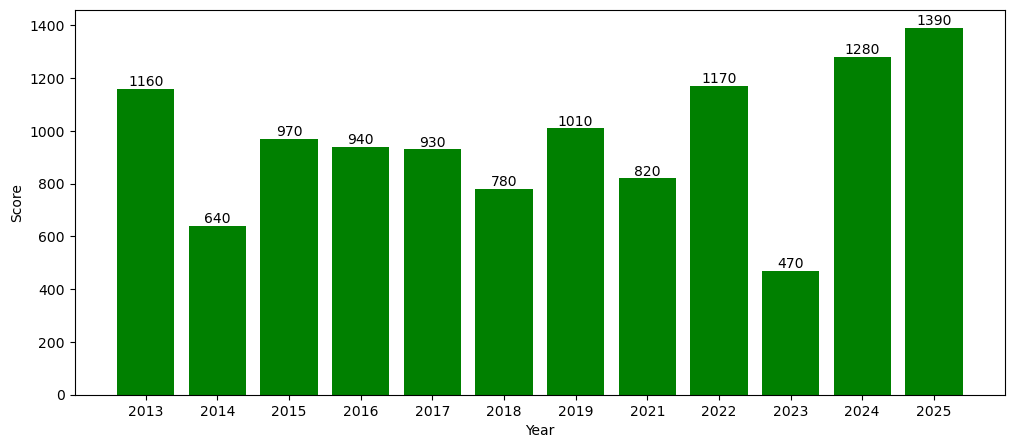

Average: 963.333
Avg. Differential: 0.645


2020's Average: 935.0
2020's Avg. Differential: 0.676


In [22]:
bracket_check(df, years)

In [24]:
df[df["Sim_Wins"] > 3].sort_values(["Year", "Sim_Wins"], ascending=False)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
1,2025,Houston,1,Midwest,4.023433,5,6,1
0,2025,Florida,1,West,2.847189,6,5,1
2,2025,Duke,1,East,3.637384,4,4,0
3,2025,Auburn,1,South,2.845762,4,4,0
68,2024,Connecticut,1,East,3.690222,6,6,0
76,2024,Houston,1,South,3.503302,2,5,3
69,2024,Purdue,1,Midwest,2.987721,5,4,1
77,2024,North Carolina,1,West,2.285512,2,4,2
144,2023,UCLA,2,West,3.231064,2,6,4
145,2023,Alabama,1,South,2.810499,2,5,3


In [25]:
df[(df["Seed"] > 9) & (df["Sim_Wins"] > 0)]

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
103,2024,New Mexico,11,West,1.127625,0,1,1
217,2022,Michigan,11,South,0.736127,2,1,1
422,2018,Syracuse,11,Midwest,0.799166,2,1,1
437,2018,Butler,10,East,0.949589,1,1,0
483,2017,Xavier,11,West,0.738103,3,1,2
503,2017,Wichita St.,10,South,1.088119,1,1,0
510,2017,Marquette,10,East,0.651646,0,1,1
547,2016,Syracuse,10,Midwest,0.781366,4,1,3
562,2016,VCU,10,West,0.818307,1,1,0
583,2016,Pittsburgh,10,East,0.766151,0,1,1


In [26]:
len(df[(df["Seed"] > 9) & (df["Sim_Wins"] > 0) & (df["Wins"] > 0)]) / len(df[(df["Seed"] > 9) & (df["Sim_Wins"] > 0)])

0.6

In [27]:
len(df[(df["Sim_Wins"] > 0) & (df["Wins"] > 0)]) / len(df[(df["Sim_Wins"] > 0)])

0.7447916666666666

In [28]:
len(df[(df["Sim_Wins"] > 1) & (df["Wins"] > 1)]) / len(df[(df["Sim_Wins"] > 1)])

0.640625

In [29]:
len(df[(df["Sim_Wins"] > 2) & (df["Wins"] > 2)]) / len(df[(df["Sim_Wins"] > 2)])

0.5208333333333334

In [30]:
len(df[(df["Sim_Wins"] > 3) & (df["Wins"] > 3)]) / len(df[(df["Sim_Wins"] > 3)])

0.4375

In [31]:
len(df[(df["Sim_Wins"] > 4) & (df["Wins"] > 4)]) / len(df[(df["Sim_Wins"] > 4)])

0.4166666666666667

In [32]:
len(df[(df["Sim_Wins"] > 5) & (df["Wins"] > 5)]) / len(df[(df["Sim_Wins"] > 5)])

0.25

In [48]:
len(df[(df["Year"] == 2019) & (df["Sim_Wins"] >= 2) & (df["Wins"] >= 2)]) / len(df[(df["Year"] == 2019) & (df["Wins"] >= 2)])

0.9375

In [55]:
df[(df["Seed"] > 9)].sort_values("Proj_Wins", ascending=False).head(20)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
773,2013,Mississippi,12,West,1.136595,1,0,1
103,2024,New Mexico,11,West,1.127625,0,1,1
503,2017,Wichita St.,10,South,1.088119,1,1,0
559,2016,Gonzaga,11,Midwest,1.077637,2,0,2
763,2013,Oregon,12,Midwest,1.057271,2,2,0
719,2014,Iowa,11,Midwest,1.033107,0,1,1
791,2013,Cincinnati,10,Midwest,1.006226,0,1,1
728,2014,Providence,11,East,0.988631,0,0,0
634,2015,Ohio St.,10,West,0.952454,1,1,0
437,2018,Butler,10,East,0.949589,1,1,0


In [56]:
df[(df["Year"] == 2013) & (df["Region"] == "Midwest")]

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
748,2013,Louisville,1,Midwest,3.719443,6,6,0
754,2013,Duke,2,Midwest,2.005617,3,3,0
760,2013,Michigan St.,3,Midwest,1.600619,2,2,0
763,2013,Oregon,12,Midwest,1.057271,2,2,0
769,2013,Saint Louis,4,Midwest,0.985313,1,1,0
770,2013,Memphis,6,Midwest,1.171007,1,1,0
771,2013,Colorado St.,8,Midwest,0.956336,1,1,0
779,2013,Creighton,7,Midwest,0.839344,1,0,1
791,2013,Cincinnati,10,Midwest,1.006226,0,1,1
782,2013,Oklahoma St.,5,Midwest,0.997894,0,0,0


In [57]:
df[(df["Seed"] > 12)].sort_values("Proj_Wins", ascending=False).head(20)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
263,2022,Chattanooga,13,South,0.559340,0,0,0
200,2023,Kent St.,13,Midwest,0.532266,0,0,0
370,2019,UC Irvine,13,South,0.510248,1,0,1
177,2023,Iona,13,West,0.468733,0,0,0
679,2015,Valparaiso,13,Midwest,0.441651,0,0,0
610,2016,Fresno St.,14,Midwest,0.439836,0,0,0
761,2013,La Salle,13,West,0.437547,2,0,2
129,2024,Samford,13,Midwest,0.436154,0,0,0
269,2022,South Dakota St.,13,Midwest,0.431453,0,0,0
543,2017,Vermont,13,Midwest,0.430598,0,0,0


In [14]:
ranks = []

for year in years:
    
    data = df[df["Year"] == year].copy()
    data.loc[:, "Wins_Rank_Safer"] = data["Proj_Wins"].rank(ascending=False).astype(int)
    
    ranks.append(data)
    
new = pd.concat(ranks)

In [28]:
new[new["Year"] == 2021].sort_values("Wins_Rank_Safer").head(25)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer,Proj_Wins_Safer
273,2021,Gonzaga,1,West,3.410034,5,6,1,3.410034
280,2021,Alabama,2,East,3.103504,2,4,2,3.103504
288,2021,Illinois,1,Midwest,3.050392,1,5,3,3.050392
272,2021,Baylor,1,South,2.891055,6,4,4,2.891055
276,2021,Michigan,1,East,2.263839,3,3,5,2.263839
289,2021,Iowa,2,West,2.192251,1,3,6,2.192251
274,2021,Houston,2,Midwest,2.167348,4,3,7,2.167348
304,2021,Ohio St.,2,South,1.807956,0,3,8,1.807956
277,2021,USC,6,West,1.733212,3,2,9,1.733212
290,2021,Colorado,5,East,1.618489,1,2,10,1.618489


In [16]:
new[(new["Seed"] == 1)].sort_values("Wins_Rank_Safer").tail(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer
410,2018,Kansas,1,Midwest,2.297941,4,3,5
480,2017,Kansas,1,Midwest,2.222606,3,4,5
425,2018,Xavier,1,West,2.142406,1,3,6
477,2017,Gonzaga,1,West,2.164552,5,4,6
550,2016,Virginia,1,Midwest,2.249577,3,3,6
612,2015,Duke,1,South,2.672354,6,4,6
764,2013,Gonzaga,1,West,1.916003,1,3,7
345,2019,Gonzaga,1,West,1.845534,3,3,9
706,2014,Wichita St.,1,Midwest,1.831515,1,2,9
549,2016,Oregon,1,West,1.747181,3,2,10


In [17]:
new[(new["Seed"] == 16)].sort_values("Wins_Rank_Safer").head(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer
470,2018,Penn,16,Midwest,0.202507,0,0,59
246,2022,Georgia St.,16,West,0.159697,0,0,59
531,2017,Texas Southern,16,South,0.166876,0,0,59
653,2015,Coastal Carolina,16,West,0.149622,0,0,59
125,2024,Longwood,16,South,0.155963,0,0,60
264,2022,Bryant,16,South,0.149845,0,0,60
537,2017,North Carolina Central,16,Midwest,0.148698,0,0,61
667,2015,North Florida,16,South,0.147923,0,0,61
42,2025,Norfolk St.,16,West,0.134288,0,0,62
119,2024,Stetson,16,East,0.148871,0,0,62


In [18]:
new[(new["Wins"] > 0)].sort_values("Wins_Rank_Safer").tail(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer
762,2013,Florida Gulf Coast,15,South,0.201915,2,0,57
435,2018,Marshall,13,East,0.207599,1,0,58
575,2016,Middle Tennessee,15,Midwest,0.219524,1,0,59
641,2015,UAB,14,South,0.148673,1,0,60
285,2021,Oral Roberts,15,South,0.128007,2,0,61
151,2023,Princeton,15,South,0.198692,2,0,62
438,2018,UMBC,16,South,0.149532,1,0,62
774,2013,Harvard,14,West,0.122915,1,0,63
210,2022,Saint Peter's,15,East,0.138841,3,0,65
162,2023,Fairleigh Dickinson,16,East,0.059520,1,0,67


In [19]:
new[(new["Seed"] > 13) & (new["Wins"] > 0)].sort_values("Wins_Rank_Safer").head(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer
639,2015,Georgia St.,14,West,0.273533,1,0,50
301,2021,Abilene Christian,14,East,0.271063,1,0,52
571,2016,Stephen F. Austin,14,East,0.334754,1,0,54
97,2024,Oakland,14,South,0.265681,1,0,55
711,2014,Mercer,14,Midwest,0.255105,1,0,56
762,2013,Florida Gulf Coast,15,South,0.201915,2,0,57
575,2016,Middle Tennessee,15,Midwest,0.219524,1,0,59
641,2015,UAB,14,South,0.148673,1,0,60
285,2021,Oral Roberts,15,South,0.128007,2,0,61
438,2018,UMBC,16,South,0.149532,1,0,62


In [23]:
new["Proj_Wins_Safer"] = new["Proj_Wins"]

new_df = new[["Year", "Team", "Proj_Wins_Safer", "Wins_Rank_Safer"]]

new_df

,Year,Team,Proj_Wins_Safer,Wins_Rank_Safer
748,2013,Louisville,3.719443,1
749,2013,Michigan,1.442656,15
750,2013,Syracuse,1.781532,8
751,2013,Wichita St.,0.918709,34
752,2013,Ohio St.,2.197652,4
...,...,...,...,...
63,2025,Wofford,0.121538,63
64,2025,Utah St.,0.551737,43
65,2025,Troy,0.178760,57
66,2025,Texas,0.617159,41


In [24]:
new_df.to_csv("../../data/safer_wins.csv")

In [29]:
new[(new["Year"] == 2025) & ((new["Team"] == "Florida") | (new["Team"] == "Houston"))]

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer,Proj_Wins_Safer
0,2025,Florida,1,West,2.847189,6,5,3,2.847189
1,2025,Houston,1,Midwest,4.023433,5,6,1,4.023433


In [38]:
new[(new["Seed"] == 16)].sort_values("Proj_Wins", ascending=False).tail(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Wins_Rank_Safer,Proj_Wins_Safer
197,2023,Southeast Missouri St.,16,South,0.063159,0,0,66,0.063159
162,2023,Fairleigh Dickinson,16,East,0.059520,1,0,67,0.059520
677,2015,Hampton,16,Midwest,0.058092,0,0,68,0.058092
460,2018,LIU Brooklyn,16,East,0.057576,0,0,67,0.057576
190,2023,Texas Southern,16,East,0.051480,0,0,68,0.051480
387,2019,North Carolina Central,16,East,0.050065,0,0,68,0.050065
449,2018,North Carolina Central,16,West,0.048491,0,0,68,0.048491
588,2016,Holy Cross,16,West,0.047832,0,0,68,0.047832
56,2025,Saint Francis,16,South,0.040812,0,0,68,0.040812
814,2013,Liberty,16,Midwest,0.039038,0,0,68,0.039038
